In [41]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [42]:
def convert_to_numeric(dataset):
  lb_make = LabelEncoder()
  dataset['sex'] = lb_make.fit_transform(dataset['sex'])                  #convert each att to numerical values
  dataset['province'] = lb_make.fit_transform(dataset['province'])
  dataset['country'] = lb_make.fit_transform(dataset['country'])
  dataset['date_confirmation'] = lb_make.fit_transform(dataset['date_confirmation'])
  dataset['outcome'] = lb_make.fit_transform(dataset['outcome'])
  return dataset

In [43]:
def create_att(dataset):
  label = dataset.iloc[:,7]                   # create different labes accroding to "outcome"
  dataset = dataset.drop(['outcome'], axis=1)         
  dataset['label'] = label                    # append label
  x = dataset.iloc[:,0:13]                    # X:df without label
  y = dataset.iloc[:,13]
  return x, y 

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [45]:
def visual(cm):
  labels=[ "deceased","hospitalized","nonhospitalized", "recovered"]
  plot_confusion_matrix(cm, labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [55]:
def create_Ada_model(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
  #adaModel = AdaBoostClassifier(n_estimators=10,learning_rate = 0.1, random_state=0)    # higher accuracy
  adaModel = AdaBoostClassifier()
  model = adaModel.fit(X_train,y_train)
  filename = 'ada_classifier.pkl'
  pickle.dump(model, open(filename, 'wb'))                                   # save the model to disk
  loaded_model = pickle.load(open(filename, 'rb'))                           # load model from disk
  test_result = loaded_model.score(X_test, y_test)                           # show training and testting set accuracy
  train_result = loaded_model.score(X_train, y_train)
  print("test accuracy",test_result)
  print("train accuracy",train_result)
  y_pred = model.predict(X_test)
  matrix = confusion_matrix(y_test, y_pred)
  return matrix

In [47]:
def create_XGB_model(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
  XGBModel = GradientBoostingClassifier(n_estimators=150,learning_rate = 0.1, random_state=0)     #tune lr to 0.1 and iteration to 150
  #XGBModel = GradientBoostingClassifier()
  model = XGBModel.fit(X_train,y_train)
  filename = 'xgb_classifier.pkl'
  pickle.dump(model, open(filename, 'wb'))      # save the model to disk
  loaded_model = pickle.load(open(filename, 'rb'))  #load model from disk
  test_result = loaded_model.score(X_test, y_test)  # show training and testting set accuracy
  train_result = loaded_model.score(X_train, y_train)
  print("test accuracy",test_result)
  print("train accuracy",train_result)
  y_pred = model.predict(X_test)
  matrix = confusion_matrix(y_test, y_pred)
  return matrix

In [51]:
def create_KNN_model(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
  #clf = neighbors.KNeighborsClassifier(n_neighbors=10)                                 #tune n_neighbors, default=5
  clf = neighbors.KNeighborsClassifier()
  model = clf.fit(X_train, y_train)
  filename = 'KNN_classifier.pkl'
  pickle.dump(model, open(filename, 'wb'))      # save the model to disk
  loaded_model = pickle.load(open(filename, 'rb'))  #load model from disk
  test_result = loaded_model.score(X_test, y_test)  # show training and testting set accuracy
  train_result = loaded_model.score(X_train, y_train)
  print("test accuracy",test_result)
  print("train accuracy",train_result)
  y_pred = model.predict(X_test)
  matrix = confusion_matrix(y_test, y_pred)
  return matrix

In [56]:
data = pd.read_csv('result.csv')
data_numeric = convert_to_numeric(data)
x, y  = create_att(data_numeric)

test accuracy 0.7776530865673839
train accuracy 0.7776272792289772
Confusion matrix, without normalization
[[    3   976    28   183]
 [    1 37503    72  3050]
 [   29    26 45846  1380]
 [    0 18206   221  1189]]


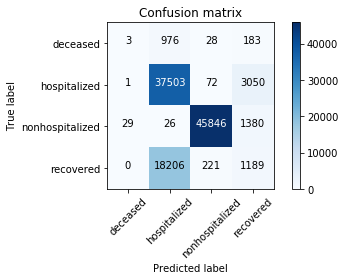

In [57]:
ada_matrix = create_Ada_model(x,y)
visual(ada_matrix)

test accuracy 0.853862923477413
train accuracy 0.8544949879383973
Confusion matrix, without normalization
[[   43   933   123    91]
 [    6 38918    28  1674]
 [   17    15 47201    48]
 [   17 12313   622  6664]]


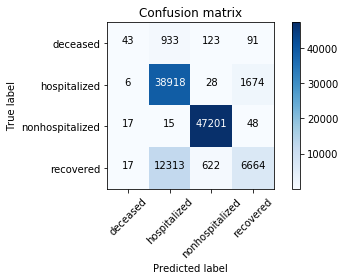

In [11]:
xgb_matrix = create_XGB_model(x,y)
visual(xgb_matrix)

test accuracy 0.8693716482849337
train accuracy 0.8804602036099721
Confusion matrix, without normalization
[[   78   779    99   234]
 [  112 35707     8  4799]
 [   47    20 46975   239]
 [   95  7409   360 11752]]


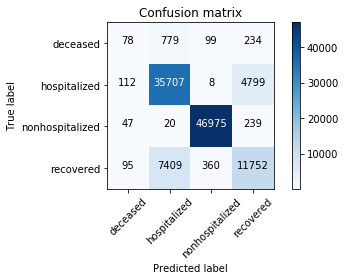

In [52]:
KNN_matrix = create_KNN_model(x,y)
visual(KNN_matrix)